x_train_data:
(3000, 32, 32, 3) float32 <class 'numpy.ndarray'>
y_train_data:
(3000,) float64 <class 'numpy.ndarray'>
x_test
(300, 32, 32, 3) float32


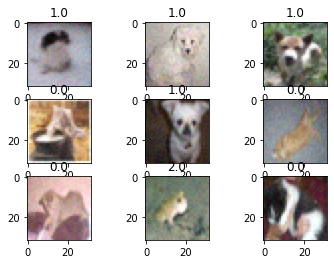

In [22]:
import numpy as np
import matplotlib.pyplot as plt

with np.load('data/prediction-challenge-02-data.npz') as fh:
    x_train_data = fh['x_train']
    y_train_data = fh['y_train']
    x_test_data = fh['x_test']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER (6000)
# 2/3. INDEX: PIXEL VALUE (32 x 32)
# 4. INDEX: COLOR CHANNELS (3)
print("x_train_data:")
print(x_train_data.shape, x_train_data.dtype, type(x_train_data))
print("y_train_data:")
print(y_train_data.shape, y_train_data.dtype, type(y_train_data))

# TEST DATA: INPUT (x) ONLY
print("x_test")
print(x_test_data.shape, x_test_data.dtype)

# plot first few images
for i in range(1,10):
    # define subplot
    plt.subplot(3,3,i)
    # plot raw pixel data
    plt.title(y_train_data[i])
    plt.imshow(x_train_data[i], cmap=plt.get_cmap('gray'))

In [2]:
# TRAIN MODEL ON x_train, y_train
# Derived for the most part from
# https://medium.com/analytics-vidhya/build-your-1st-deep-learning-classification-model-with-mnist-dataset-1eb27227746b
# and
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
# for structure
# and
# https://www.kaggle.com/moghazy/guide-to-cnns-with-data-augmentation-keras
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# for data augmentation
# https://www.machinecurve.com/index.php/2020/02/18/how-to-use-k-fold-cross-validation-with-keras/
# for cross validation
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
#load mnist dataset
x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=0.20)

# (x_train,y_train),(x_test,y_test)= mnist.load_data()
# plt.imshow(x_train[0], cmap=plt.get_cmap('gray')) 
# print("x_train.shape: ", x_train.shape)
# print("x_train.shape[0]: ", x_train.shape[0])

#Reshaping the array to 4-dims so that it can work with the Keras API
# x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
# x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
input_shape = (32, 32, 3)

# print("x_train.shape: ", x_train.shape)
# print("x_test.shape: ", x_test.shape)

# Making sure that the values are float so that we can get decimal 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# # Normalizing the RGB codes by dividing it to the max RGB value.
# x_train /= 255.0
# x_test /= 255.0

model = Sequential() 
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(128, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.3)) 

model.add(Flatten()) 
model.add(Dense(200,activation = tf.nn.relu)) 
model.add(Dropout(0.3)) 
model.add(Dense(3,activation=tf.nn.softmax))

# opt = SGD(lr=0.001, momentum=0.9)
opt = 'adam'
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='accuracy',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-3,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1)
]

# DATA AUGMENTATION
# train_datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     shear_range=0.2,
#     zoom_range=0.2
#     validation_split = 0.2
# )

datagen = ImageDataGenerator(
#     rotation_range=45,
#     zoom_range=0.3,
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     vertical_flip=True
)

# # prepare iterators
generator = datagen.flow(x_train, y_train, batch_size=64)


history = model.fit_generator(generator,
                              steps_per_epoch=len(generator),
                              epochs=300,
                              verbose=1,
                              callbacks = callbacks,
#                               max_queue_size=10,
#                               workers=3
                             )



Using TensorFlow backend.
C:\Users\fjun\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\fjun\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\fjun\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\fjun\anaconda3\envs\tf\lib\site-packages\tensorflo

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/300
38/38 [==============================] - 36s 945ms/step - loss: 1.0594 - accuracy: 0.4300
Epoch 2/300
38/38 [==============================] - 35s 925ms/step - loss: 0.9435 - accuracy: 0.5350
Epoch 3/300
38/38 [==============================] - 35s 921ms/step - loss: 0.8664 - accuracy: 0.5788
Epoch 4/300
38/38 [==============================] - 36s 939ms/step - loss: 0.8037 - accuracy: 0.6196
Epoch 5/300
38/38 [==============================] - 34s 902ms/step - loss: 0.7785 - accuracy: 0.6350
Epoch 6/300
38/38 [==============================] - 38s 991ms/step - loss: 0.7154 - accuracy: 0.6646
Epoch 7/300
38/38 [==============================] - 35s 917ms/step - loss: 0.7405 - accuracy: 0.6671
Epoch 8/300
38/38 [==============================] - 36s 952ms/step - loss: 0.6883 - accuracy: 0.6775
Epoch 9/300
38/38 [==============================] - 39s 1s/step - loss: 0.6345 - accuracy: 0.7233
Epoch 10/300


In [8]:
# evaluate the model on the test data
model.evaluate(x_test, y_test)

600/600 [==============================] - 4s 7ms/step


[0.9086574578285217, 0.6833333373069763]

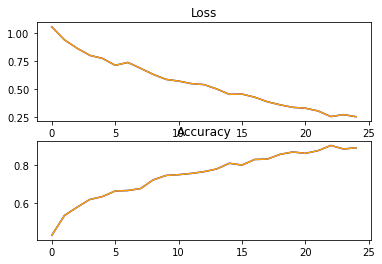

In [4]:
from matplotlib import pyplot

# plot loss
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['accuracy'], color='orange', label='test')
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + '_plot.png')
pyplot.show()

In [20]:
# PREDICT prediction FROM x_test
import numpy as np
x_predict = x_test_data.reshape(x_test_data.shape[0], 32, 32, 3)
predictions = model.predict(x_predict)

# prediction = np.empty([2000]) 
prediction = np.argmax(predictions, axis=1) # THAT'S YOUR JOB
print(prediction.shape)
print(prediction)

(300,)
[2 2 0 1 0 0 0 0 2 0 1 1 1 1 0 2 2 0 0 0 0 1 0 2 1 2 2 0 0 2 0 2 1 1 0 2 2
 1 2 2 0 1 1 0 1 0 2 0 0 1 1 0 1 2 2 0 0 2 0 2 1 0 2 1 0 1 2 2 2 2 2 2 1 2
 2 2 2 1 2 0 1 0 0 0 0 2 1 1 2 0 2 1 2 0 2 1 1 0 2 0 1 2 1 1 1 2 1 1 1 1 1
 2 1 1 2 0 2 0 1 2 1 1 2 0 0 1 1 0 1 2 0 0 0 2 1 1 2 1 0 0 1 2 2 0 0 1 0 2
 1 1 0 1 1 2 2 0 2 2 1 0 2 0 0 1 0 0 0 0 1 2 0 0 2 2 2 0 0 1 0 2 1 1 2 2 1
 2 2 0 2 0 2 1 0 1 2 2 0 0 0 2 1 2 2 0 1 2 2 0 1 0 1 1 2 2 1 0 2 2 0 0 2 0
 1 1 2 0 1 2 2 0 2 0 2 0 1 1 1 2 0 2 1 2 2 1 0 1 1 0 2 1 0 2 2 0 1 1 2 1 1
 2 1 1 2 1 1 0 2 2 1 0 1 0 1 0 2 1 2 2 2 1 2 0 0 1 2 1 1 0 0 1 0 0 0 2 0 0
 2 1 1 2]


In [6]:
# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert prediction.ndim == 1
assert prediction.shape[0] == 300

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('results/prediction.npy', prediction)

i:  0


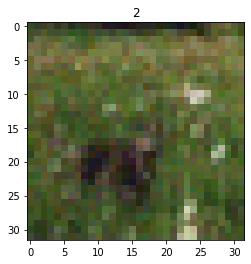

i:  1


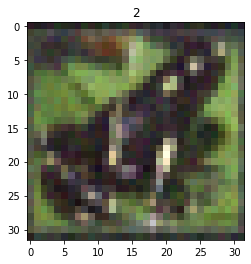

i:  2


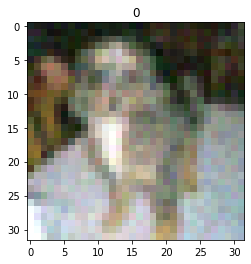

i:  3


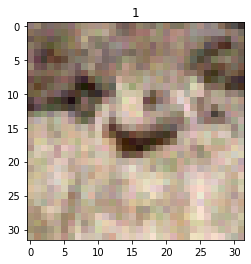

i:  4


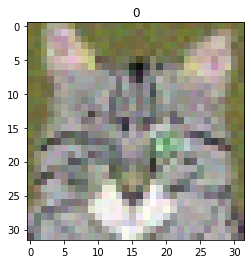

i:  5


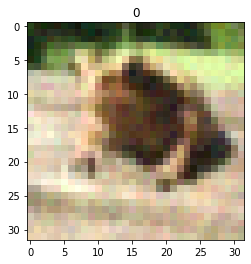

i:  6


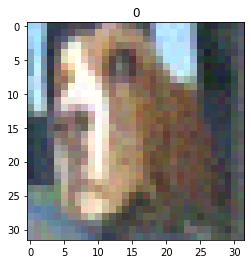

i:  7


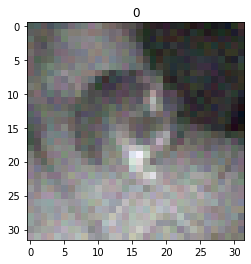

i:  8


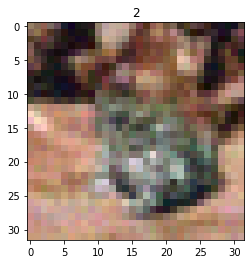

i:  9


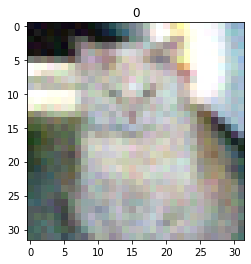

i:  10


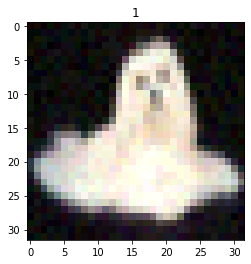

i:  11


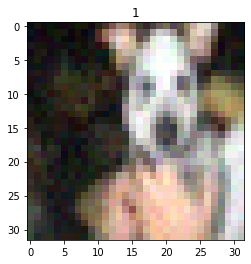

i:  12


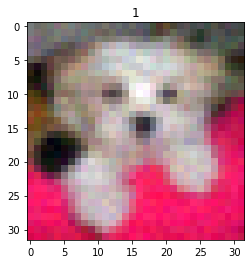

i:  13


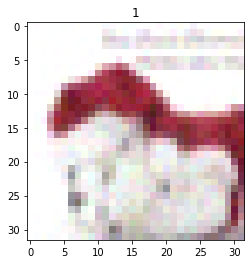

i:  14


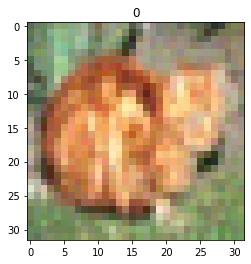

i:  15


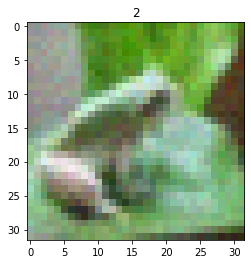

i:  16


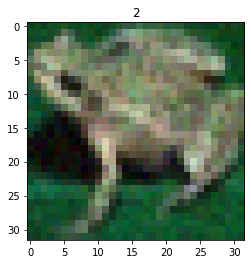

i:  17


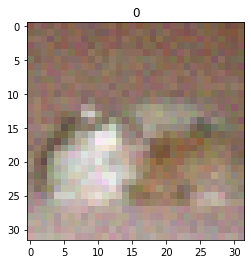

i:  18


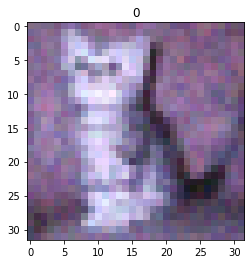

i:  19


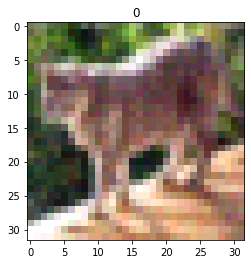

i:  20


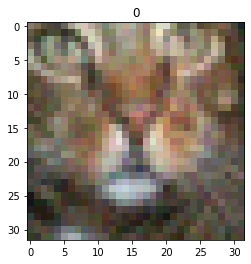

i:  21


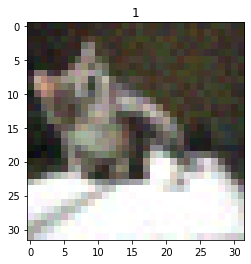

i:  22


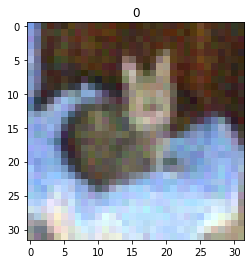

i:  23


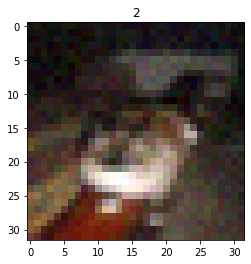

i:  24


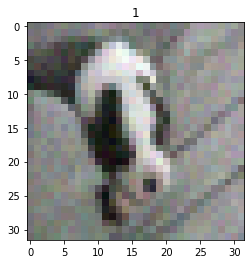

i:  25


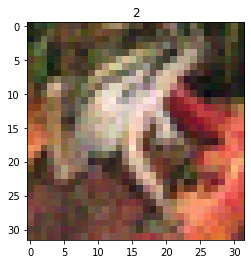

i:  26


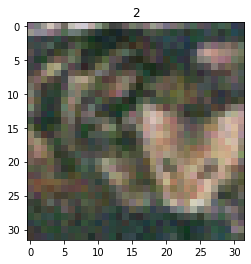

i:  27


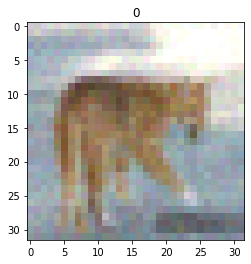

i:  28


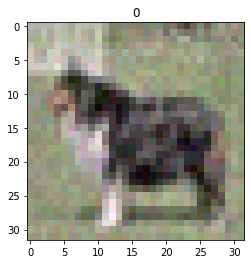

i:  29


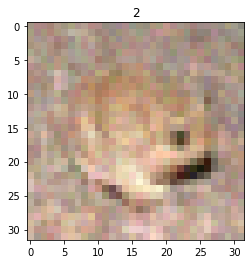

i:  30


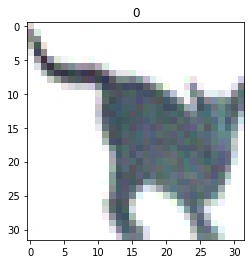

i:  31


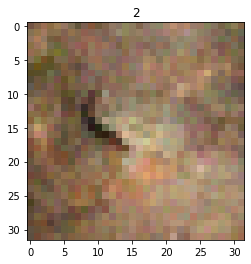

i:  32


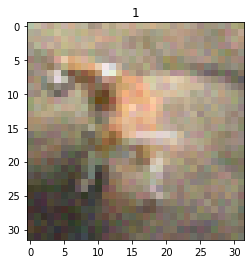

i:  33


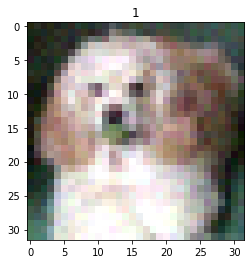

i:  34


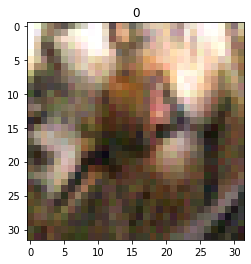

i:  35


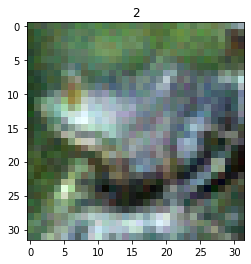

i:  36


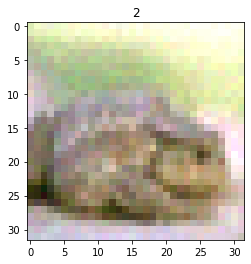

i:  37


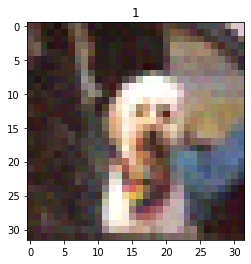

i:  38


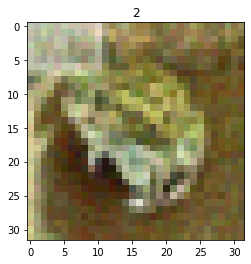

i:  39


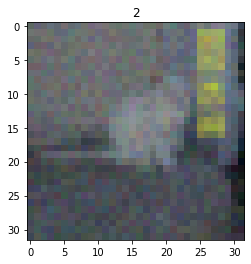

i:  40


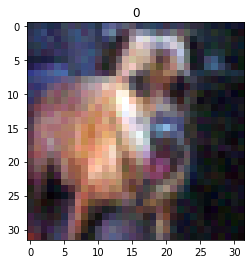

i:  41


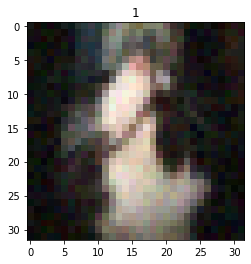

i:  42


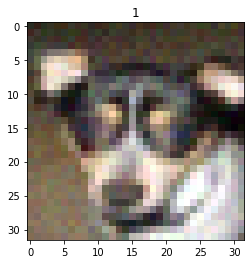

i:  43


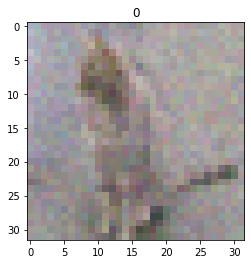

i:  44


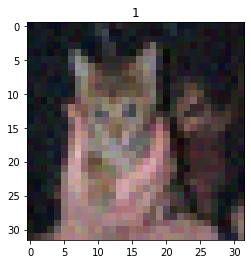

i:  45


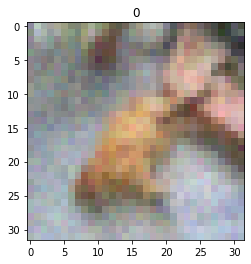

i:  46


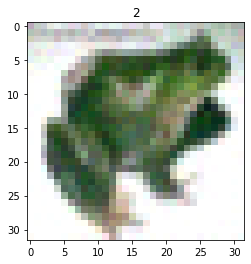

i:  47


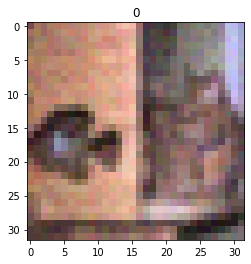

i:  48


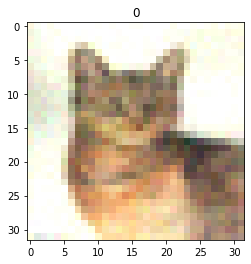

i:  49


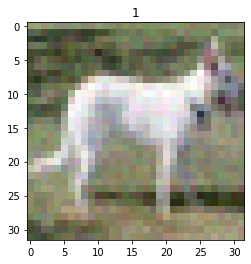

i:  50


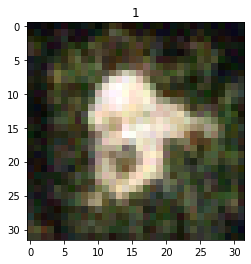

i:  51


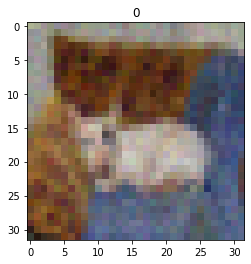

i:  52


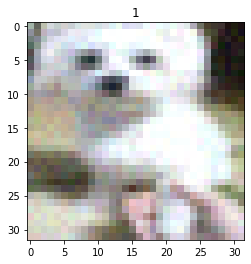

i:  53


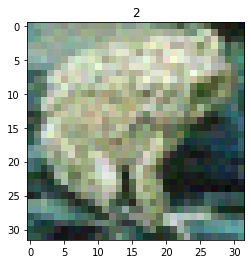

i:  54


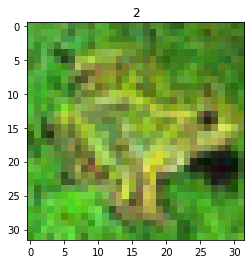

i:  55


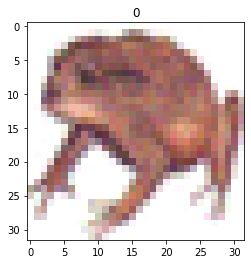

i:  56


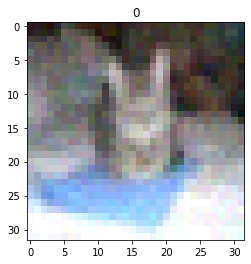

i:  57


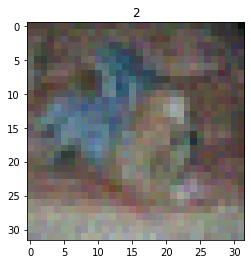

i:  58


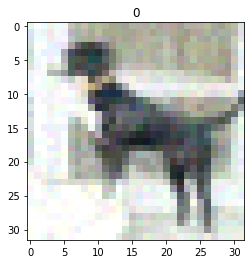

i:  59


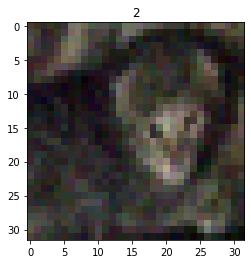

i:  60


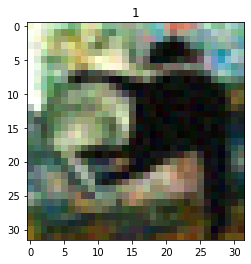

i:  61


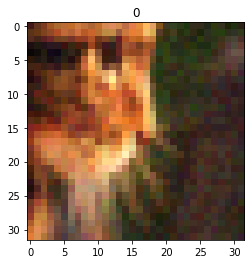

i:  62


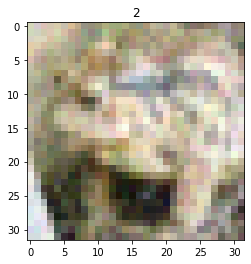

i:  63


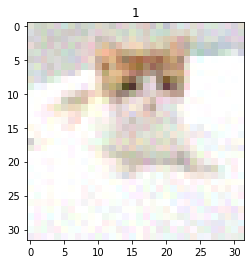

i:  64


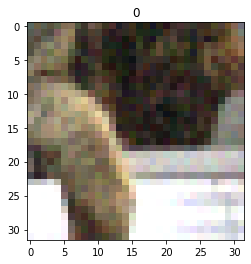

i:  65


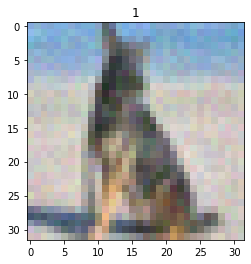

i:  66


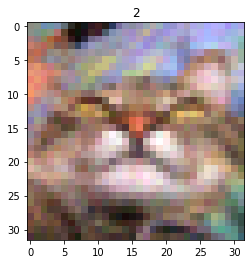

i:  67


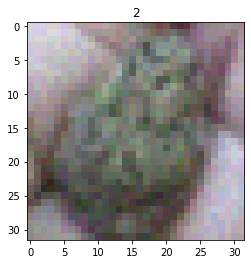

i:  68


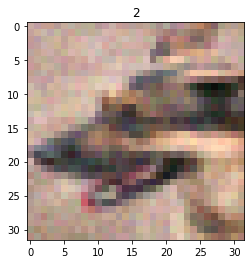

i:  69


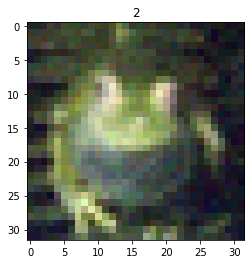

i:  70


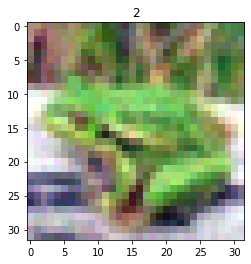

i:  71


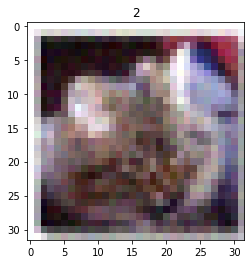

i:  72


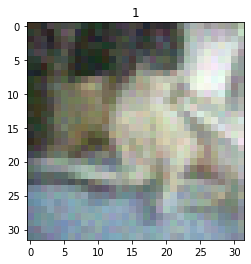

i:  73


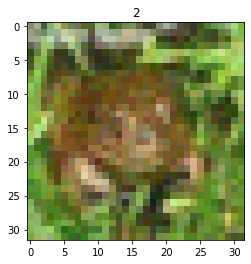

i:  74


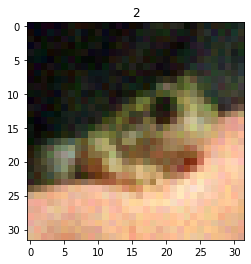

i:  75


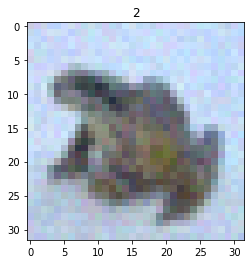

i:  76


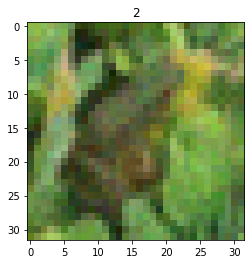

i:  77


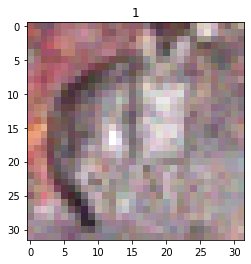

i:  78


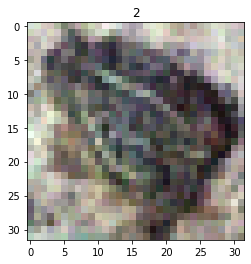

i:  79


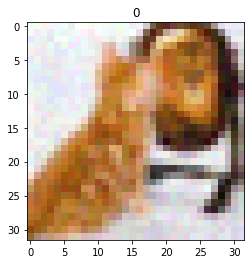

i:  80


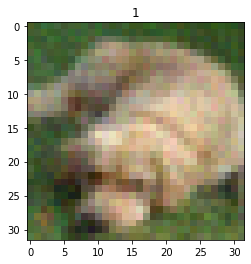

i:  81


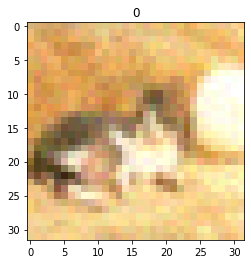

i:  82


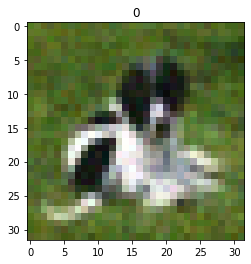

i:  83


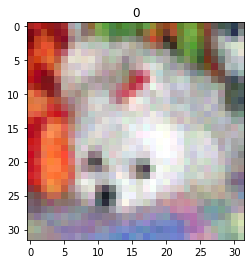

i:  84


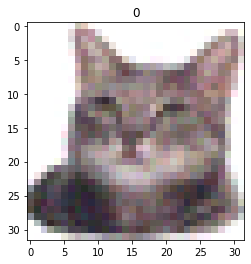

i:  85


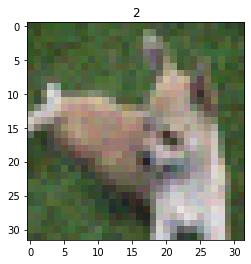

i:  86


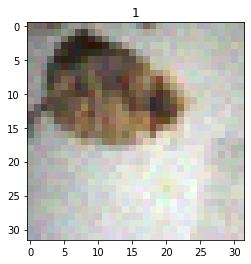

i:  87


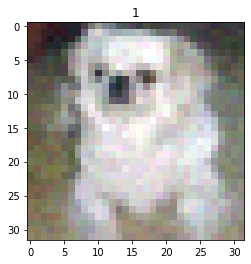

i:  88


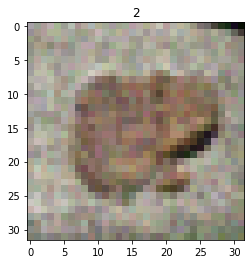

i:  89


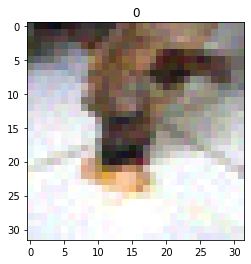

i:  90


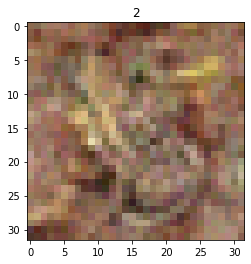

i:  91


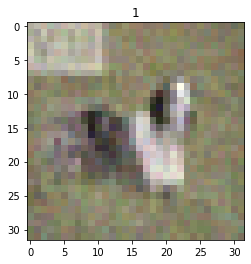

i:  92


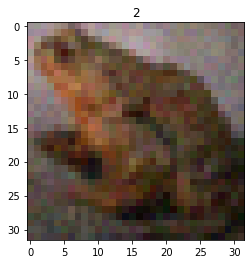

i:  93


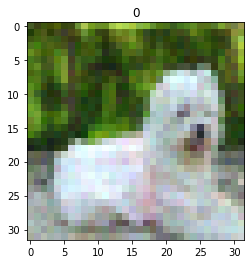

i:  94


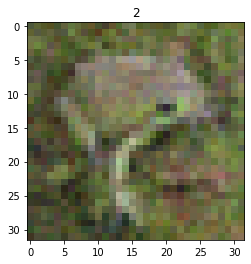

i:  95


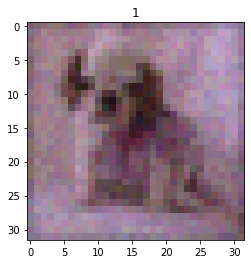

i:  96


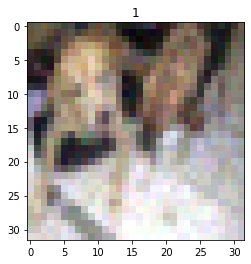

i:  97


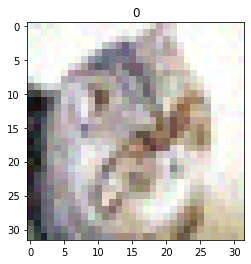

i:  98


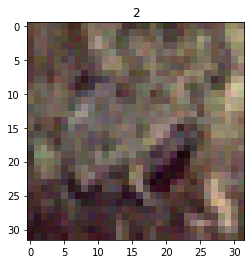

i:  99


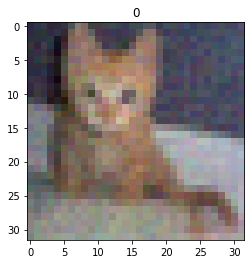

In [26]:
# 100 prints to compare some results
for i in range(100):
    print("i: ", i)
    plt.imshow(x_test_data[i])
    plt.title(prediction[i])
    plt.show()
